# Exploration of the dataset:
## Source: https://www.kaggle.com/datasets/davidbroberts/brain-tumor-object-detection-datasets

In [1]:
import os
from matplotlib import pyplot as plt  
import cv2
import random
from src.utils import get_data

In [2]:
# Load dataset
plane = "axial/"

training_dataset = get_data("train/", plane)
test_dataset = get_data("test/", plane)

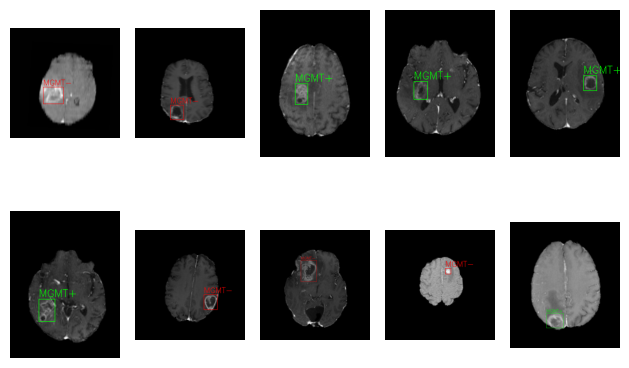

In [3]:
# Display examples
label_color = {0: (255, 0, 0), 1: (0, 255, 0)}
label_text = {0: "MGMT-", 1: "MGMT+"}

samples = random.sample(training_dataset, 10)

for i, sample in enumerate(samples):
    img_path = sample["image_path"]
    labels = sample["labels"]
    bboxes = sample["bboxes"]

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_h, img_w = img.shape[:2]

    for label, bbox in zip(labels, bboxes):
        x_center, y_center, width, height = bbox

        x_1 = int((x_center - width/2) * img_w)
        y_1 = int((y_center - height/2) * img_h)
        x_2 = int((x_center + width/2) * img_w)
        y_2 = int((y_center + height/2) * img_h)

        color = label_color.get(label,(0, 0, 0))
        text = label_text.get(label, "Unknown" )

        cv2.rectangle(img, (x_1, y_1), (x_2, y_2), color)
        cv2.putText(img, text, (x_1, y_1-4), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color)

    plt.figure("Display samples")
    plt.subplot(2, 5, i+1) 
    plt.imshow(img)
    plt.axis('off')

plt.tight_layout()  
plt.show()

In [4]:
print("Training dataset size : " + str(len(training_dataset)))
print("Test dataset size : " + str(len(test_dataset)))         

Training dataset size : 296
Test dataset size : 75


{'1': 283, '2': 13}
{'0': 123, '1': 186}


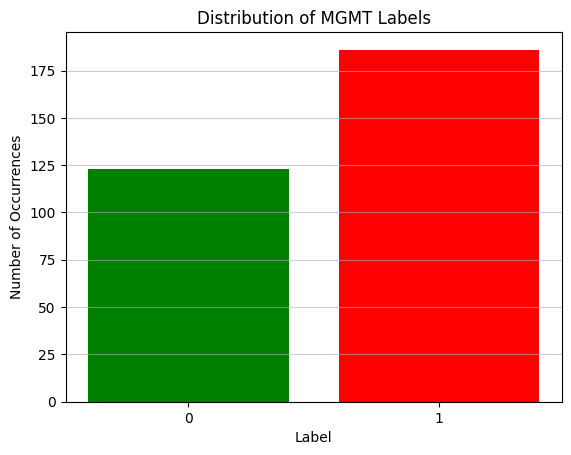

In [7]:
NB_BBOX_PER_IMAGES = {}
MGMT = {"0":0, "1":0}
for sample in training_dataset:
     labels = sample["labels"]
     if str(len(labels)) not in NB_BBOX_PER_IMAGES:
        NB_BBOX_PER_IMAGES[str(len(labels))] = 1
     else:
        NB_BBOX_PER_IMAGES[str(len(labels))] +=1
     for label in labels:
         MGMT[str(label)] +=1
print(NB_BBOX_PER_IMAGES)
print(MGMT)

plt.bar(
    MGMT.keys(),           
    MGMT.values(),         
    color=['green', 'red'] 
)

plt.title("Distribution of MGMT Labels")
plt.xlabel("Label")
plt.ylabel("Number of Occurrences")
plt.grid(axis='y', linestyle='-', alpha=0.6)
plt.show()